#  Graduate Admissions

## Regression analysis using Tensorflow Neural Network

In [1]:
import warnings
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing data

In [2]:
df = pd.read_pickle(r'C:\Users\nishi\Desktop\df.pkl')

In [3]:
# Shuffle data
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

df = df.sample(frac=1).reset_index(drop=True)

1.12.0


In [4]:
df.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,327,103,3,4.0,4.0,8.30,1,0.74
1,314,106,2,4.0,3.5,8.25,0,0.62
2,319,110,3,3.5,3.5,9.04,0,0.82
3,322,112,4,3.5,2.5,9.02,1,0.73
4,295,96,2,1.5,2.0,7.34,0,0.47


### Features
- gre_score
- toefl_score
- university_rating
- sop
- lor
- cgpa
- research

### Target
- chance_of_admit

In [5]:
X = df[['gre_score','toefl_score','cgpa','research']]
y = df[['chance_of_admit']]

### Splitting the data for training and testing
- Train the model with 90% of data
- Test against remaining 20%

In [6]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Normalize features

In [7]:
# Normalizing Features

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [8]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Wall time: 7.11 ms


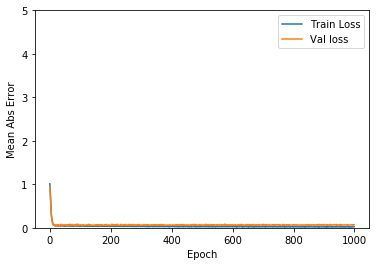

In [10]:
%%time
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history)


.......................................Wall time: 633 ms


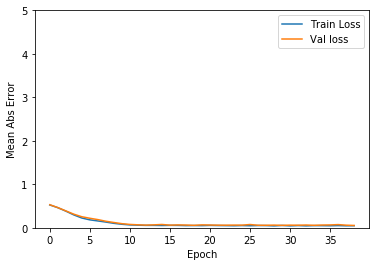

In [11]:
%%time
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [12]:
%%time
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae))

Testing set Mean Abs Error: $   0.05
Wall time: 5.5 ms


Wall time: 31.2 ms


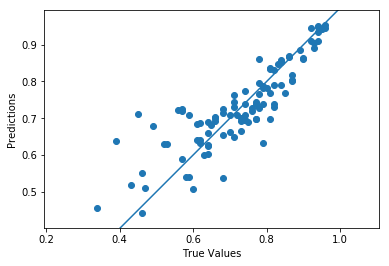

In [13]:
%%time
test_predictions = model.predict(test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

In [14]:
result = test_data.copy()
result['predicted_chance_of_admit'] = test_predictions
result['actual_chance_of_admit'] = test_labels
result['difference'] = abs(result['predicted_chance_of_admit']-result['actual_chance_of_admit'])

In [15]:
result.head()

,gre_score,toefl_score,cgpa,research,predicted_chance_of_admit,actual_chance_of_admit,difference
361,1.040794,0.445364,0.724712,0.876349,0.834351,0.81,0.024351
73,2.009383,1.088489,1.926072,0.876349,0.944426,0.96,0.015574
374,0.688579,-0.358542,0.286378,-1.138246,0.782490,0.79,0.007510
155,1.304955,1.410052,1.309157,0.876349,0.903982,0.93,0.026018
104,0.512472,-0.680105,-0.898747,0.876349,0.683127,0.61,0.073127


### Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:


\begin{equation*}
\sqrt{\frac1n\sum_{i=1}^n (y_{true} - y_{pred})^2}
\end{equation*}

In [27]:
print(np.sqrt(metrics.mean_squared_error(test_labels, test_predictions)))

0.07099454017742718


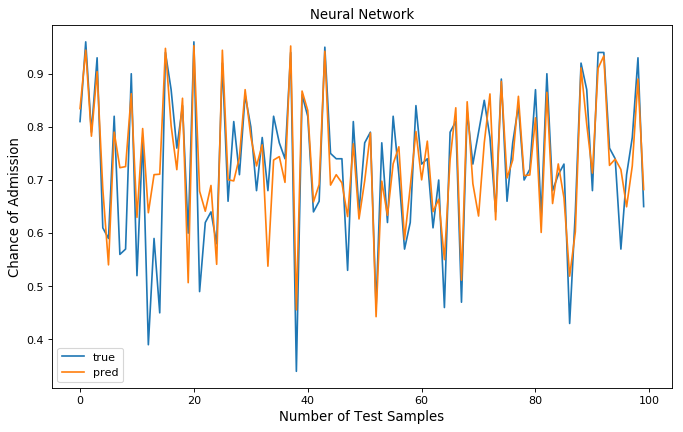

In [28]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test_labels.values.ravel(), '-',label = 'true')
plt.plot(test_predictions, '-',label = 'pred')
plt.title('Neural Network', fontsize = 'large')
plt.xlabel('Number of Test Samples', fontsize = 'large') 
plt.ylabel('Chance of Admission', fontsize = 'large')
plt.legend()

In [18]:
result[['actual_chance_of_admit','predicted_chance_of_admit','difference']].to_csv(r'C:\Users\nishi\Desktop\TfNeuralNetwork.csv', index=False, header = ['ChanceOfAdmit','Predicted','Delta'])

In [19]:
output_error = test_labels.values - test_predictions

error_lin_reg = np.mean(np.abs(output_error))
accuracy_lin_reg = (1 - error_lin_reg) * 100

print("Test Accuracy " + str(round(accuracy_lin_reg,2)) + "%")

Test Accuracy 85.53%
